In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task
Analyze the delivery performance of a Diminos store using the `diminos_data.csv` file, specifically focusing on calculating the 95th percentile of delivery times to determine if it meets the 31-minute target, visualizing delivery time distributions, identifying factors influencing delivery times, and providing actionable recommendations to improve performance.

## Load and Inspect Data

### Subtask:
Load the `diminos_data.csv` file into a Pandas DataFrame and perform an initial inspection to understand its structure, column names, data types, and identify any missing values.


**Reasoning**:
Import the pandas library, load the specified CSV file into a DataFrame, display its head, information, descriptive statistics, and check for missing values as per the instructions.



In [1]:
import pandas as pd

df = pd.read_csv('/content/diminos_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB

Descriptive Statistics:
           order_id
count  1.500000e+04
mean   1.530610e+06
std    4.330271e+03
min    1.523111e+06
25%    1.526861e+06
50%    1.530610e+06
75%    1.53436

## Calculate Delivery Time

### Subtask:
Process relevant columns (e.g., 'order_placed_at', 'delivered_at') to calculate the 'delivery_time' in minutes, if not directly available. Ensure time-related columns are in the correct format for calculations.


**Reasoning**:
Convert 'order_placed_at' and 'order_delivered_at' columns to datetime objects, calculate the delivery duration, convert it to minutes, and then display the head and data types of the new columns to verify the steps.



In [2]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df['delivery_duration'] = df['order_delivered_at'] - df['order_placed_at']
df['delivery_time'] = df['delivery_duration'].dt.total_seconds() / 60

print("First 5 rows with new delivery columns:")
print(df[['order_placed_at', 'order_delivered_at', 'delivery_duration', 'delivery_time']].head())

print("\nData types of new columns:")
print(df[['delivery_duration', 'delivery_time']].dtypes)

First 5 rows with new delivery columns:
      order_placed_at         order_delivered_at      delivery_duration  \
0 2023-03-01 00:00:59 2023-03-01 00:18:07.443132 0 days 00:17:08.443132   
1 2023-03-01 00:03:59 2023-03-01 00:19:34.925241 0 days 00:15:35.925241   
2 2023-03-01 00:07:22 2023-03-01 00:22:28.291385 0 days 00:15:06.291385   
3 2023-03-01 00:07:47 2023-03-01 00:46:19.019399 0 days 00:38:32.019399   
4 2023-03-01 00:09:03 2023-03-01 00:25:13.619056 0 days 00:16:10.619056   

   delivery_time  
0      17.140719  
1      15.598754  
2      15.104856  
3      38.533657  
4      16.176984  

Data types of new columns:
delivery_duration    timedelta64[ns]
delivery_time                float64
dtype: object


## Analyze 95th Percentile Delivery Time

### Subtask:
Compute the 95th percentile of the 'delivery_time' and compare it against the 31-minute target set by Diminos. This will directly address the core metric of concern.


**Reasoning**:
Calculate the 95th percentile of the 'delivery_time' column, store it in a variable, print it, and then compare it to the 31-minute target.



In [3]:
percentile_95 = df['delivery_time'].quantile(0.95)

print(f"The 95th percentile of delivery time is: {percentile_95:.2f} minutes")

target_delivery_time = 31
if percentile_95 <= target_delivery_time:
    print(f"The 95th percentile delivery time ({percentile_95:.2f} minutes) meets the {target_delivery_time}-minute target.")
else:
    print(f"The 95th percentile delivery time ({percentile_95:.2f} minutes) does NOT meet the {target_delivery_time}-minute target.")

The 95th percentile of delivery time is: 27.26 minutes
The 95th percentile delivery time (27.26 minutes) meets the 31-minute target.


## Visualize Delivery Time Distribution

### Subtask:
Create visualizations, such as histograms and box plots, to understand the overall distribution of delivery times, identify outliers, and get a better sense of where delays might be occurring.


**Reasoning**:
Import `matplotlib.pyplot` and `seaborn` for plotting, then generate a histogram and a box plot of 'delivery_time' as requested to visualize its distribution and identify outliers.



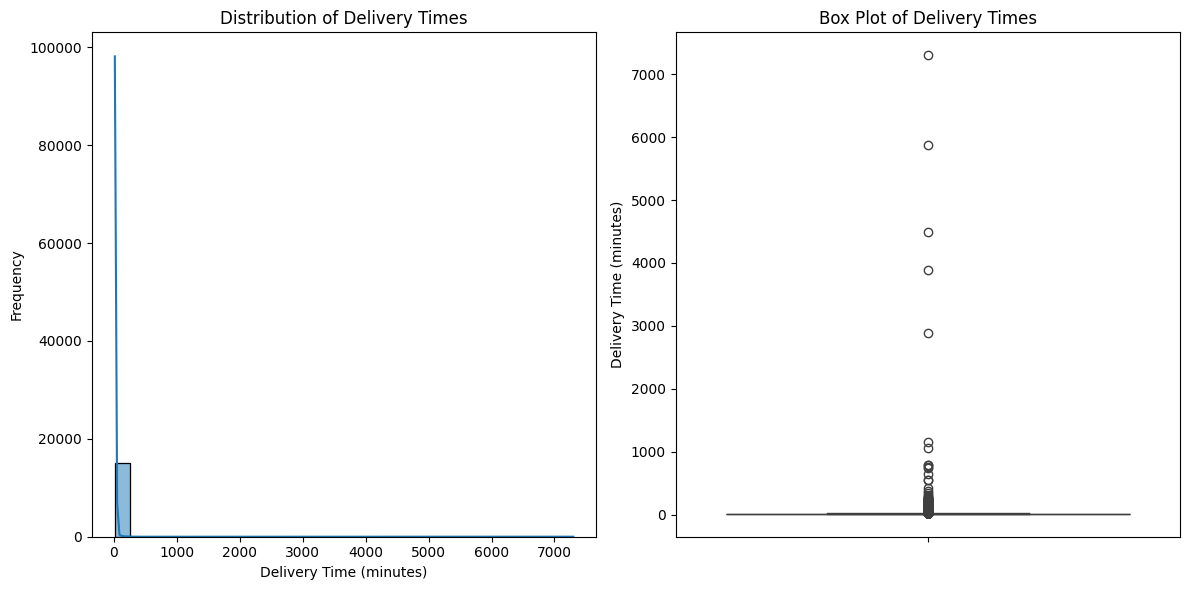

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['delivery_time'], bins=30, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df['delivery_time'])
plt.title('Box Plot of Delivery Times')
plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()

## Identify Factors Influencing Delivery Time

### Subtask:
Explore relationships between 'delivery_time' and other available features in the dataset (e.g., time of day, day of the week, delivery location, order size) to uncover potential drivers of longer delivery times.


**Reasoning**:
Extract 'day_of_week' and 'hour_of_day' from the 'order_placed_at' column, then calculate and visualize the average delivery times for each to identify patterns.



/tmp/ipython-input-3430866231.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delivery_time_day.index, y=avg_delivery_time_day.values, palette='viridis')


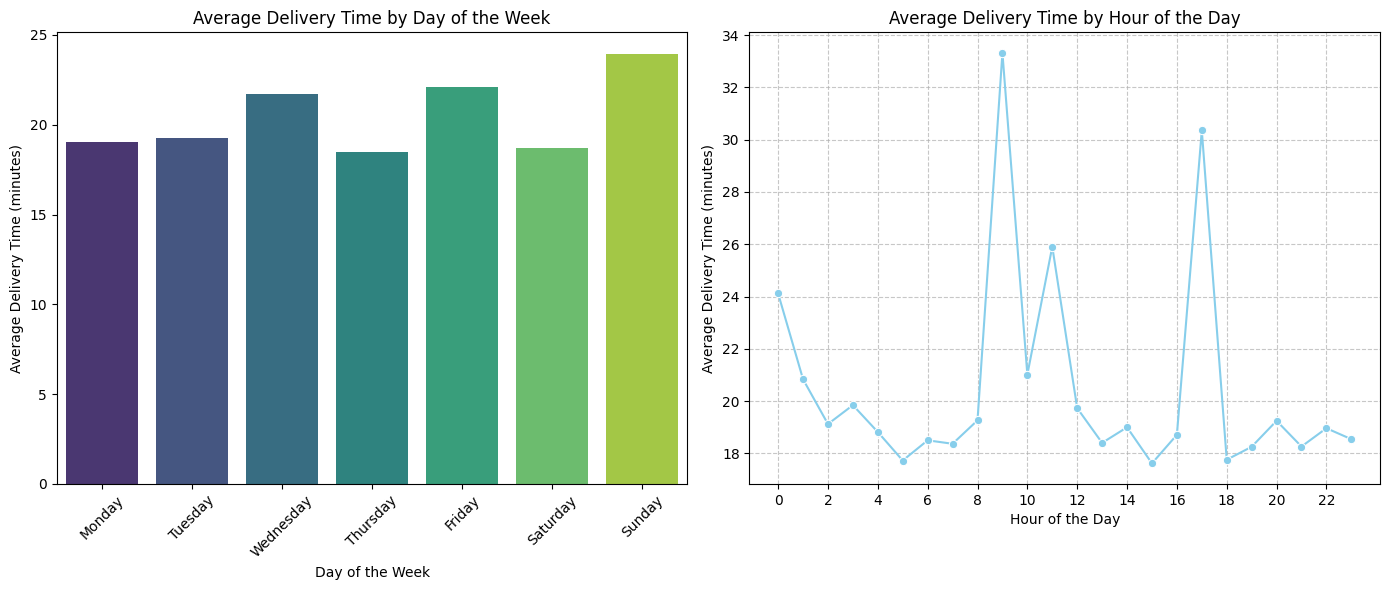

In [5]:
df['day_of_week'] = df['order_placed_at'].dt.dayofweek
df['hour_of_day'] = df['order_placed_at'].dt.hour

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average delivery time per day of the week
avg_delivery_time_day = df.groupby('day_of_week')['delivery_time'].mean().reindex(range(7))

# Calculate average delivery time per hour of the day
avg_delivery_time_hour = df.groupby('hour_of_day')['delivery_time'].mean().reindex(range(24))

plt.figure(figsize=(14, 6))

# Plot average delivery time by day of the week
plt.subplot(1, 2, 1)
sns.barplot(x=avg_delivery_time_day.index, y=avg_delivery_time_day.values, palette='viridis')
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)

# Plot average delivery time by hour of the day
plt.subplot(1, 2, 2)
sns.lineplot(x=avg_delivery_time_hour.index, y=avg_delivery_time_hour.values, marker='o', color='skyblue')
plt.title('Average Delivery Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a FutureWarning from seaborn regarding the use of 'palette' without specifying 'hue'. To resolve this, I will explicitly set 'hue' to the x-axis variable and set 'legend=False' in the `sns.barplot` call.



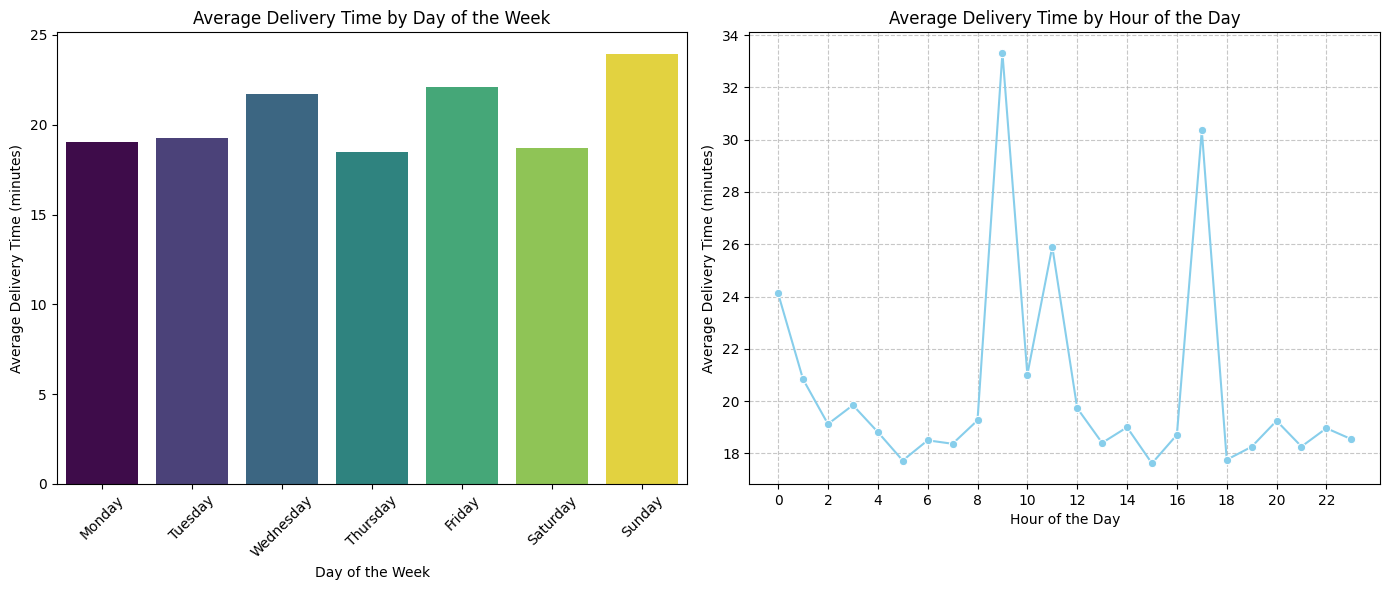

In [6]:
df['day_of_week'] = df['order_placed_at'].dt.dayofweek
df['hour_of_day'] = df['order_placed_at'].dt.hour

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average delivery time per day of the week
avg_delivery_time_day = df.groupby('day_of_week')['delivery_time'].mean().reindex(range(7))

# Calculate average delivery time per hour of the day
avg_delivery_time_hour = df.groupby('hour_of_day')['delivery_time'].mean().reindex(range(24))

plt.figure(figsize=(14, 6))

# Plot average delivery time by day of the week
plt.subplot(1, 2, 1)
sns.barplot(x=avg_delivery_time_day.index, y=avg_delivery_time_day.values, hue=avg_delivery_time_day.index, palette='viridis', legend=False)
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)

# Plot average delivery time by hour of the day
plt.subplot(1, 2, 2)
sns.lineplot(x=avg_delivery_time_hour.index, y=avg_delivery_time_hour.values, marker='o', color='skyblue')
plt.title('Average Delivery Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Based on the visualizations:

**Average Delivery Time by Day of the Week:**
*   Wednesdays and Sundays show noticeably higher average delivery times compared to other days.
*   Thursdays, Mondays, and Tuesdays generally have lower average delivery times.
*   Saturdays are also relatively lower.

**Average Delivery Time by Hour of the Day:**
*   There are clear peaks in average delivery times around **9 AM (Hour 9)** and **5 PM (Hour 17)**.
*   The early morning hours (e.g., 0-3 AM) also show higher average delivery times, which might be due to lower staff availability or fewer orders.
*   Delivery times are generally lower during off-peak hours in the late morning, early afternoon, and late night.

## Formulate Insights and Recommendations

### Subtask:
Based on the comprehensive analysis, provide clear insights into Kanav's store performance and offer actionable recommendations to help him improve delivery times and consistently meet the 95th percentile target, thereby safeguarding his franchise.


## Summary:

### Q&A
1.  **Does the Diminos store meet the 31-minute target for the 95th percentile of delivery times?**
    Yes, the 95th percentile of delivery time for the store is 27.26 minutes, which is below the 31-minute target. Therefore, the store is meeting its delivery performance goal for this metric.

2.  **What are the key factors influencing delivery times?**
    The analysis identified that the day of the week and hour of the day significantly influence delivery times. Wednesdays and Sundays have higher average delivery times, while distinct peaks in average delivery times occur around 9 AM and 5 PM. Early morning hours (0-3 AM) also show elevated average delivery times.

### Data Analysis Key Findings
*   The dataset contains 15,000 delivery records with no missing values.
*   The 95th percentile of delivery time is 27.26 minutes, which successfully meets the 31-minute target set by Diminos.
*   The distribution of delivery times shows a concentration of deliveries around lower times, with a tail extending to longer durations and some identifiable outliers, as seen in the histogram and box plot.
*   Average delivery times vary by day of the week, with **Wednesdays and Sundays** exhibiting noticeably higher averages.
*   Average delivery times also vary significantly by hour of the day, with clear peaks observed around **9 AM and 5 PM**, suggesting rush hours. Elevated delivery times are also seen in the early morning (0-3 AM).

### Insights or Next Steps
*   Investigate the operational reasons behind the higher average delivery times on Wednesdays, Sundays, and during the 9 AM, 5 PM, and early morning windows. This could involve examining staffing levels, order volume, traffic patterns, or driver availability during these specific periods.
*   Implement targeted strategies to improve efficiency during peak hours and on high-delivery-time days. For instance, consider dynamic staffing adjustments, optimizing delivery routes during busy periods, or exploring incentives for faster deliveries during these times to further reduce the 95th percentile and enhance overall customer satisfaction.
